<a href="https://colab.research.google.com/github/corelogic/gcoe_geospatial_imagery_analytics/blob/master/firebreak_image_classification/FastAI_Classifier_data_build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
#Mount gcp bucket

!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!apt -qq install gcsfuse

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0   107k      0 --:--:-- --:--:-- --:--:--  107k
OK
79 packages can be upgraded. Run 'apt list --upgradable' to see them.
The following NEW packages will be installed:
  gcsfuse
0 upgraded, 1 newly installed, 0 to remove and 79 not upgraded.
Need to get 10.8 MB of archives.
After this operation, 23.2 MB of additional disk space will be used.
Selecting previously unselected package gcsfuse.
(Reading database ... 148492 files and directories currently installed.)
Preparing to unpack .../gcsfuse_0.36.0_amd64.deb ...
Unpacking gcsfuse (0.36.0) ...
Setting up gcsfuse (0.36.0) ...


In [ ]:
#More mounting

!mkdir gcoeBucket
!gcsfuse --implicit-dirs geospatial-analytics gcoeBucket

2021/09/14 20:28:32.782940 Using mount point: /content/gcoeBucket
2021/09/14 20:28:32.790999 Opening GCS connection...
2021/09/14 20:28:33.117258 Mounting file system "geospatial-analytics"...
2021/09/14 20:28:33.156031 File system has been successfully mounted.


In [ ]:
#Test the mount worked
!ls gcoeBucket/firebreak_image_classification/Colorado

jpg_footprints	jpg_images


# **Explore Data**

Install `geopandas` and all the dependencies

In [ ]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 79 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 4s (618 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 148497 files and directories currently installed.)
Preparing to unpack .../python3-numpy_1%

In [ ]:
import geopandas
import requests

gdf = geopandas.read_file('gcoeBucket/firebreak_image_classification/Colorado/jpg_footprints/CO_ML_Image_Footprints.zip')

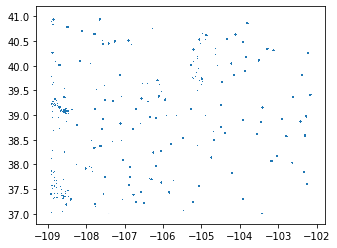

In [ ]:
gdf.plot()

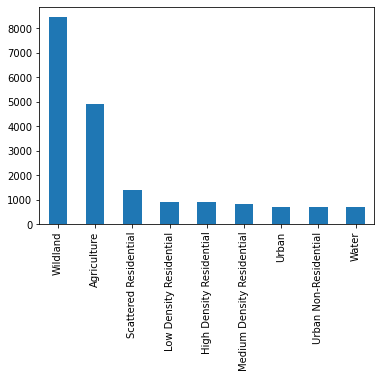

In [ ]:
cBreakname = gdf['BREAK_NAME'].value_counts()
ax = cBreakname.plot.bar()

In [ ]:
gdf.head()

,OBJECTID,STATE,BREAK_NAME,RISK_VALUE,FLAG,TF_ID,Shape_Leng,Shape_Area,geometry
0,1,Colorado,Scattered Residential,5,None,919316,0.016382,0.000016,"POLYGON ((-104.57467 37.18572, -104.57933 37.1..."
1,2,Colorado,Scattered Residential,5,None,1520760,0.016418,0.000017,"POLYGON ((-108.82277 37.57178, -108.82742 37.5..."
2,3,Colorado,Scattered Residential,5,None,1520761,0.016560,0.000017,"POLYGON ((-108.83674 38.99888, -108.84140 38.9..."
3,4,Colorado,Scattered Residential,5,None,1520763,0.016406,0.000017,"POLYGON ((-108.68768 37.44760, -108.69234 37.4..."
4,5,Colorado,Scattered Residential,5,None,1520764,0.016402,0.000017,"POLYGON ((-108.76687 37.40861, -108.77153 37.4..."


In [ ]:
gdf['BREAK_NAME'].value_counts()

Wildland                      8448
Agriculture                   4883
Scattered Residential         1397
Low Density Residential        914
High Density Residential       887
Medium Density Residential     826
Urban                          707
Urban Non-Residential          695
Water                          695
Name: BREAK_NAME, dtype: int64

In [ ]:
gdf['BREAK_NAME'].count()

19452

# **View Firebreak Image Data**

In [ ]:
from fastai.vision import *

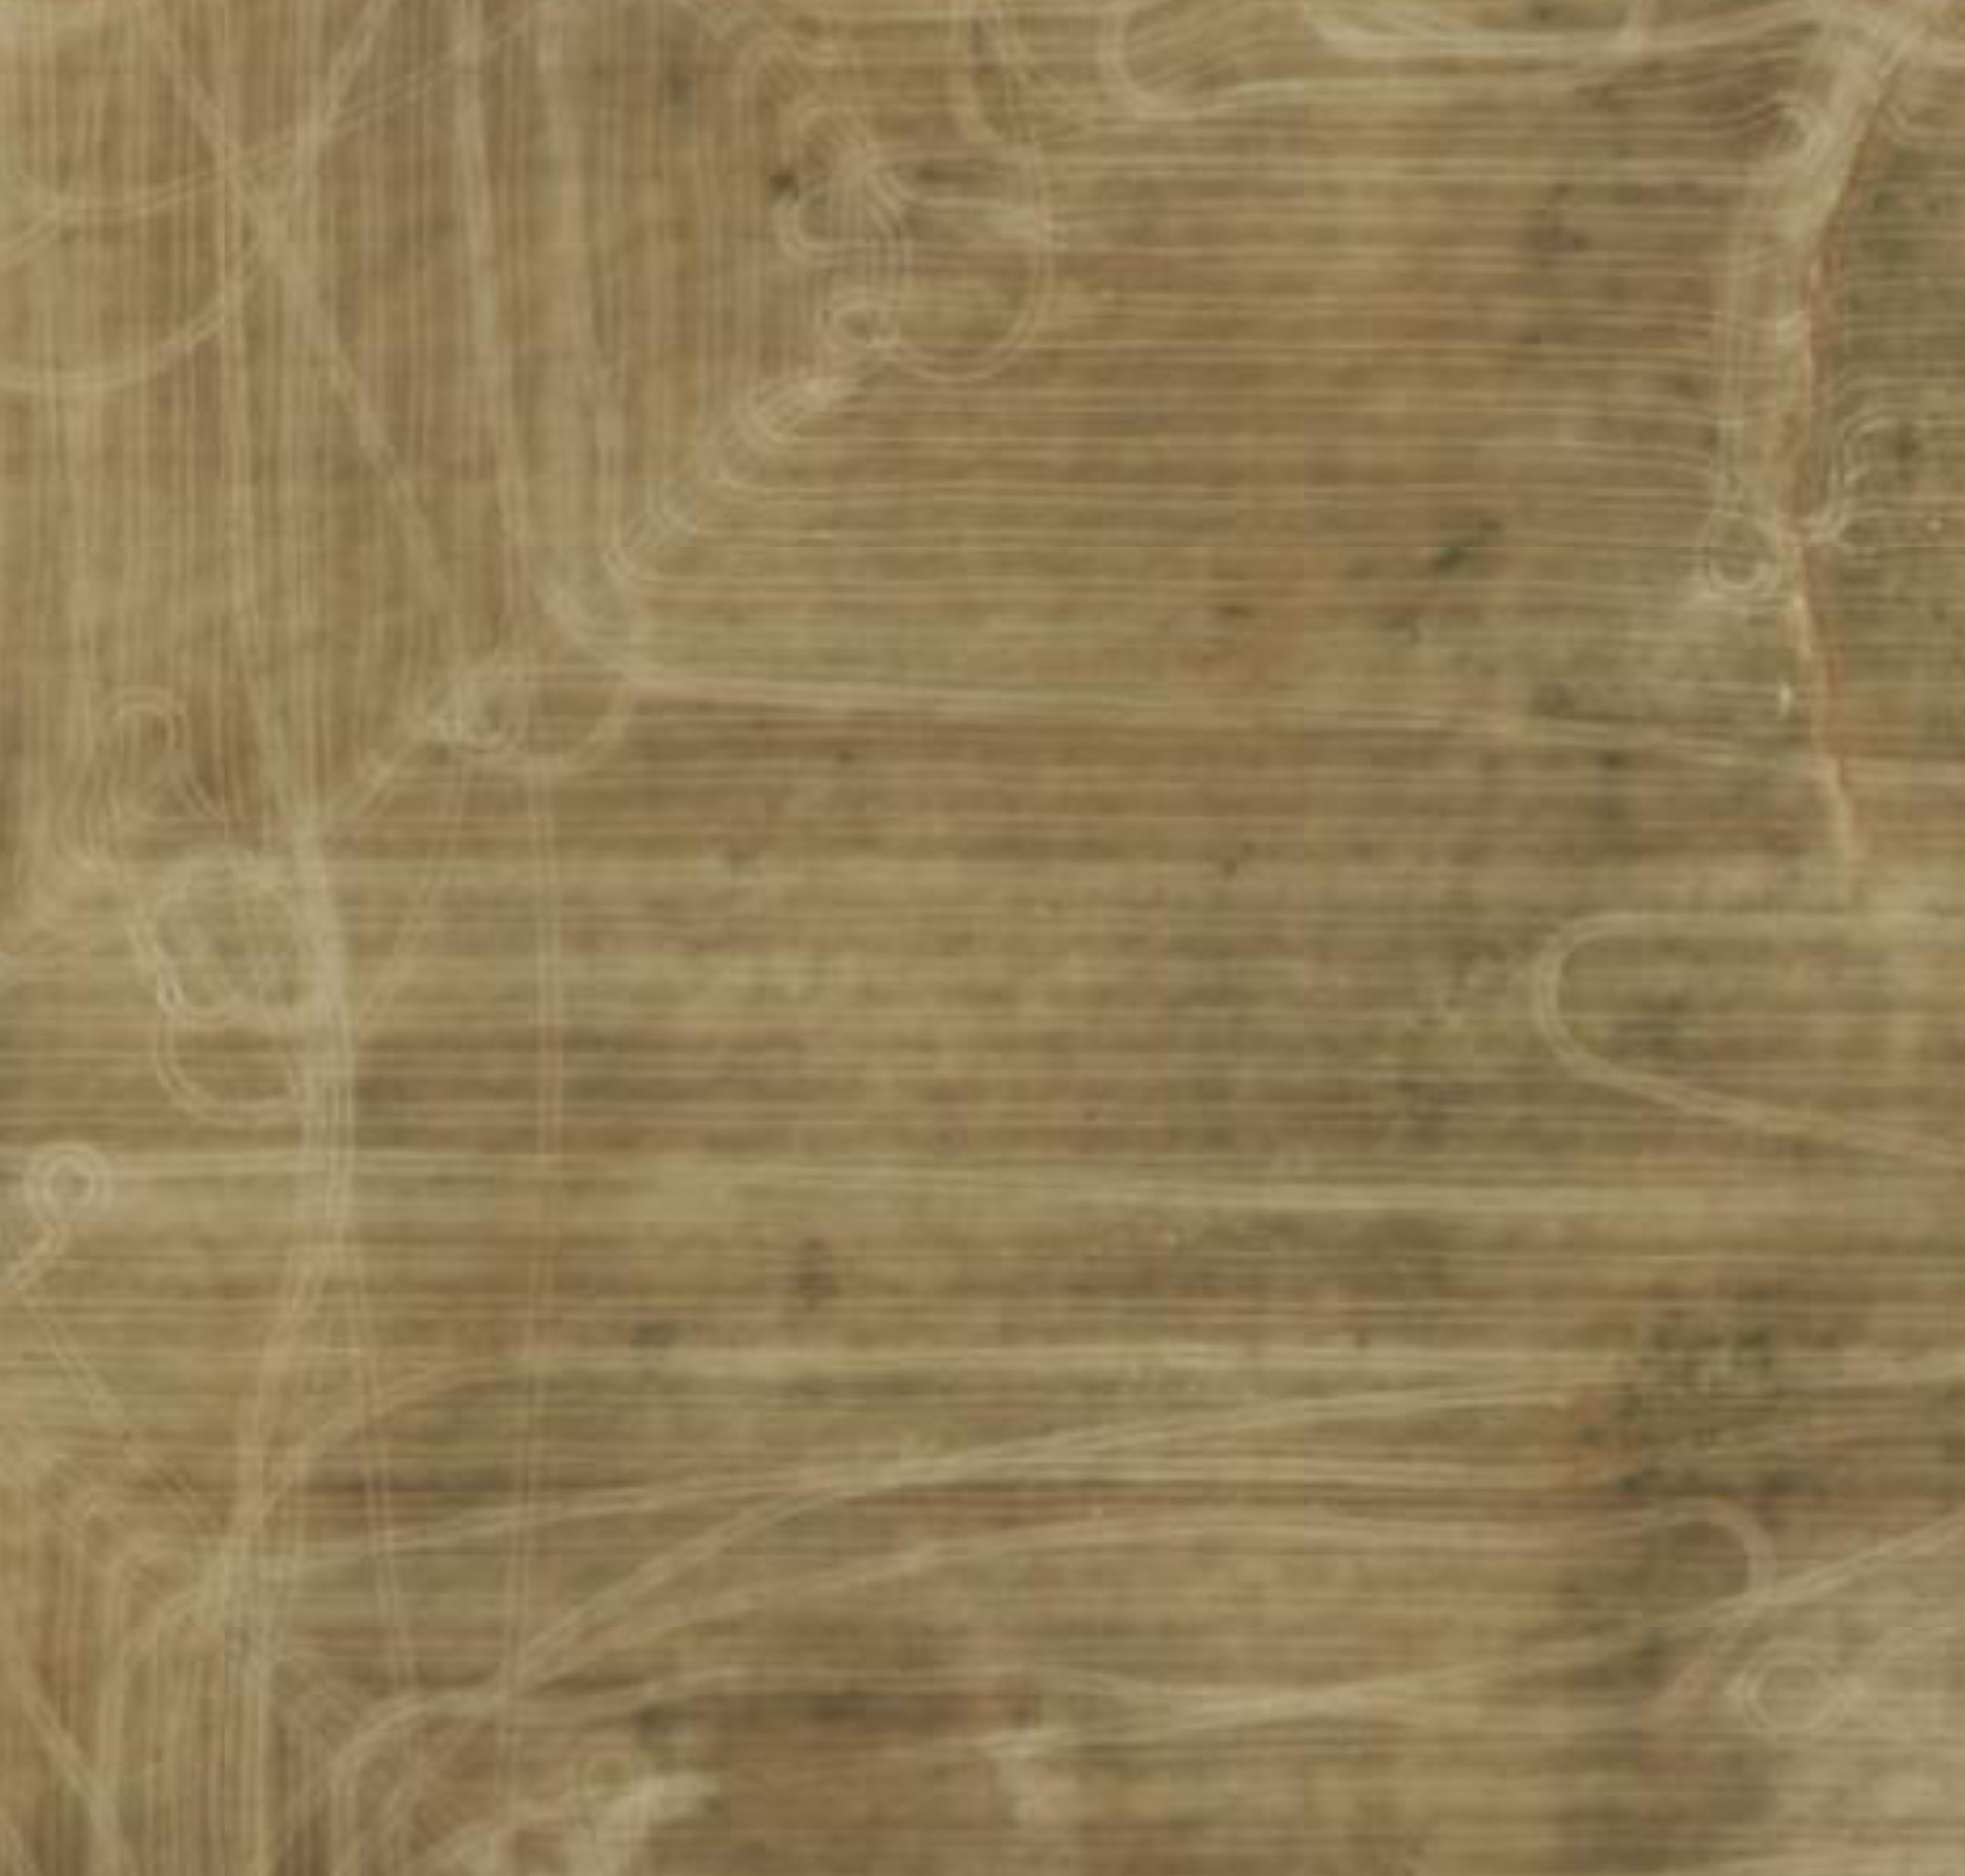

In [ ]:
# Open an image file

img = open_image('gcoeBucket/firebreak_image_classification/Colorado/jpg_images/Agriculture1000209.jpg')
img

In [ ]:
# View some image statistics

img.data, img.shape, img.size

(tensor([[[0.6980, 0.7020, 0.7059,  ..., 0.5922, 0.5922, 0.5922],
          [0.6980, 0.7020, 0.7059,  ..., 0.5961, 0.5961, 0.5961],
          [0.7020, 0.7020, 0.7059,  ..., 0.6000, 0.6000, 0.6000],
          ...,
          [0.5412, 0.5412, 0.5451,  ..., 0.6627, 0.6627, 0.6627],
          [0.5412, 0.5412, 0.5451,  ..., 0.6627, 0.6627, 0.6627],
          [0.5373, 0.5412, 0.5451,  ..., 0.6627, 0.6627, 0.6627]],
 
         [[0.6314, 0.6353, 0.6392,  ..., 0.4980, 0.4980, 0.4980],
          [0.6314, 0.6353, 0.6392,  ..., 0.5020, 0.5020, 0.5020],
          [0.6353, 0.6353, 0.6392,  ..., 0.5059, 0.5059, 0.5059],
          ...,
          [0.4549, 0.4549, 0.4588,  ..., 0.6000, 0.6000, 0.6000],
          [0.4549, 0.4549, 0.4588,  ..., 0.6000, 0.6000, 0.6000],
          [0.4510, 0.4549, 0.4588,  ..., 0.6000, 0.6000, 0.6000]],
 
         [[0.4627, 0.4667, 0.4706,  ..., 0.3647, 0.3647, 0.3647],
          [0.4627, 0.4667, 0.4706,  ..., 0.3686, 0.3686, 0.3686],
          [0.4667, 0.4667, 0.4706,  ...,

Images are 2480x2598px in size and dimension. They should be resized for when running in model.


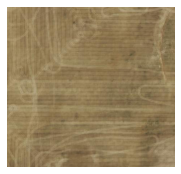

In [ ]:
# Image size is pretty big, view a thumbnail instead
img.show()

# **Prepare Data for ML Model**

In [24]:
# Name variable for path to images

photoDir = 'gcoeBucket/firebreak_image_classification/Colorado/jpg_images/'
data_dir = pathlib.Path(photoDir)
print(data_dir)

gcoeBucket/firebreak_image_classification/Colorado/jpg_images


In [25]:
# Use the fastai function 'get_image_files' to retreive all the image files in one folder. it is recursive! so it get all the images in subfolders too.
files = get_image_files(data_dir)

# Get a count of all image files in data directory
len(files)

19452

In [26]:
# Show me some of the pathname examples to get the category from the file names of images

files[0], files[16000], files[9000].name, files[7000].name

(PosixPath('gcoeBucket/firebreak_image_classification/Colorado/jpg_images/Agriculture1000209.jpg'),
 PosixPath('gcoeBucket/firebreak_image_classification/Colorado/jpg_images/Wildland497236.jpg'),
 'Urban Non-Residential1661645.jpg',
 'Medium Density Residential1523892.jpg')

In [27]:
# The pattern is always the same. The category name is followed by the unique ID
# numbers and then the file extension.

files[0].name, files[10000].name

('Agriculture1000209.jpg', 'Urban1586495.jpg')

In [28]:
# Define a function for pulling category labels from image filenames.

print(data_dir)

# Testing:
import re

def get_labels(file_path):
  return re.sub(r'\d+.jpg','', str(file_path))

get_labels(files[0].name)

gcoeBucket/firebreak_image_classification/Colorado/jpg_images


'Agriculture'